# 準備

## Googleドライブのマウント

In [1]:


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [2]:
import sys
sys.path.append('/content/drive/My Drive/DNN_code')
sys.path.append('/content/drive/My Drive/DNN_code/lesson_2')

# overfiting

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.17
                : 10. 正答率(テスト) = 0.1411
Generation: 20. 正答率(トレーニング) = 0.29
                : 20. 正答率(テスト) = 0.2017
Generation: 30. 正答率(トレーニング) = 0.3333333333333333
                : 30. 正答率(テスト) = 0.2321
Generation: 40. 正答率(トレーニング) = 0.3933333333333333
                : 40. 正答率(テスト) = 0.2651
Generation: 50. 正答率(トレーニング) = 0.4666666666666667
                : 50. 正答率(テスト) = 0.3115
Generation: 60. 正答率(トレーニング) = 0.5766666666666667
                : 60. 正答率(テスト) = 0.3657
Generation: 70. 正答率(トレーニング) = 0.6133333333333333
                : 70. 正答率(テスト) = 0.4312
Generation: 80. 正答率(トレーニング) = 0.6766666666666666
                : 80. 正答率(テスト) = 0.4827
Generation: 90. 正答率(トレーニング) = 0.7266666666666667
                : 90. 正答率(テスト) = 0.5293
Generation: 100. 正答率(トレーニング) = 0.72
                : 100. 正答率(テスト) = 0.5508
Generation: 110. 正答率(トレーニング) = 0.78
                : 110. 正答率(テスト) = 0.5947
Generation: 120. 正答率(トレーニング) = 0.7933333333333333
             

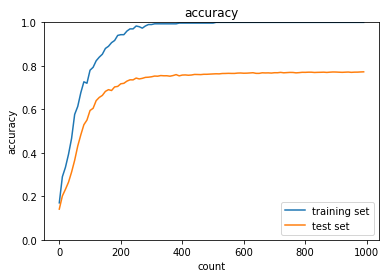

In [3]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## weight decay
### L2

### L2

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.18333333333333332
                : 10. 正答率(テスト) = 0.1208
Generation: 20. 正答率(トレーニング) = 0.25
                : 20. 正答率(テスト) = 0.1648
Generation: 30. 正答率(トレーニング) = 0.29333333333333333
                : 30. 正答率(テスト) = 0.2139
Generation: 40. 正答率(トレーニング) = 0.37666666666666665
                : 40. 正答率(テスト) = 0.2661
Generation: 50. 正答率(トレーニング) = 0.44333333333333336
                : 50. 正答率(テスト) = 0.2939
Generation: 60. 正答率(トレーニング) = 0.49666666666666665
                : 60. 正答率(テスト) = 0.3201
Generation: 70. 正答率(トレーニング) = 0.52
                : 70. 正答率(テスト) = 0.338
Generation: 80. 正答率(トレーニング) = 0.55
                : 80. 正答率(テスト) = 0.3723
Generation: 90. 正答率(トレーニング) = 0.5666666666666667
                : 90. 正答率(テスト) = 0.3963
Generation: 100. 正答率(トレーニング) = 0.5766666666666667
                : 100. 正答率(テスト) = 0.4141
Generation: 110. 正答率(トレーニング) = 0.5933333333333334
                : 110. 正答率(テスト) = 0.4383
Generation: 120. 正答率(トレーニング) = 0.623333333333

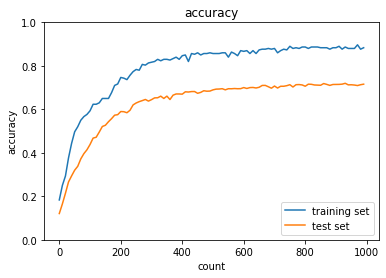

In [4]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.5866666666666667
                : 10. 正答率(テスト) = 0.3925
Generation: 20. 正答率(トレーニング) = 0.5166666666666667
                : 20. 正答率(テスト) = 0.3812
Generation: 30. 正答率(トレーニング) = 0.6366666666666667
                : 30. 正答率(テスト) = 0.5193
Generation: 40. 正答率(トレーニング) = 0.82
                : 40. 正答率(テスト) = 0.6219
Generation: 50. 正答率(トレーニング) = 0.82
                : 50. 正答率(テスト) = 0.6624
Generation: 60. 正答率(トレーニング) = 0.8166666666666667
                : 60. 正答率(テスト) = 0.6657
Generation: 70. 正答率(トレーニング) = 0.5666666666666667
                : 70. 正答率(テスト) = 0.4596
Generation: 80. 正答率(トレーニング) = 0.7233333333333334
                : 80. 正答率(テスト) = 0.5443
Generation: 90. 正答率(トレーニング) = 0.8333333333333334
                : 90. 正答率(テスト) = 0.6582
Generation: 100. 正答率(トレーニング) = 0.8033333333333333
                : 100. 正答率(テスト) = 0.63
Generation: 110. 正答率(トレーニング) = 0.54
                : 110. 正答率(テスト) = 0.4296
Generation: 120. 正答率(トレーニング) = 0.89
               

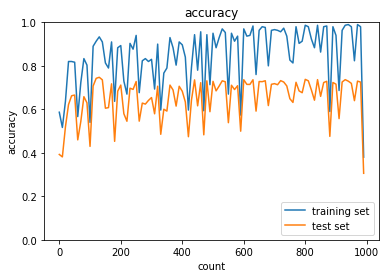

In [5]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.005
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------
## [try] weigth_decay_lambdaの値を変更して正則化の強さを確認しよう
----------------------------------------------------------------------------------------------------------------------------------------

### 1


### L2

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.5766666666666667
                : 10. 正答率(テスト) = 0.4647
Generation: 20. 正答率(トレーニング) = 0.6033333333333334
                : 20. 正答率(テスト) = 0.4743
Generation: 30. 正答率(トレーニング) = 0.4266666666666667
                : 30. 正答率(テスト) = 0.3398
Generation: 40. 正答率(トレーニング) = 0.5133333333333333
                : 40. 正答率(テスト) = 0.3735
Generation: 50. 正答率(トレーニング) = 0.4666666666666667
                : 50. 正答率(テスト) = 0.3618
Generation: 60. 正答率(トレーニング) = 0.6166666666666667
                : 60. 正答率(テスト) = 0.5078
Generation: 70. 正答率(トレーニング) = 0.64
                : 70. 正答率(テスト) = 0.5072
Generation: 80. 正答率(トレーニング) = 0.49666666666666665
                : 80. 正答率(テスト) = 0.3954
Generation: 90. 正答率(トレーニング) = 0.5
                : 90. 正答率(テスト) = 0.4061
Generation: 100. 正答率(トレーニング) = 0.5333333333333333
                : 100. 正答率(テスト) = 0.4366
Generation: 110. 正答率(トレーニング) = 0.5333333333333333
                : 110. 正答率(テスト) = 0.4294
Generation: 120. 正答率(トレーニング) = 0.59

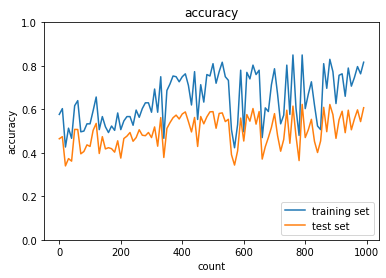

In [6]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.01
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.5466666666666666
                : 10. 正答率(テスト) = 0.4061
Generation: 20. 正答率(トレーニング) = 0.6433333333333333
                : 20. 正答率(テスト) = 0.4709
Generation: 30. 正答率(トレーニング) = 0.47333333333333333
                : 30. 正答率(テスト) = 0.3719
Generation: 40. 正答率(トレーニング) = 0.47333333333333333
                : 40. 正答率(テスト) = 0.3895
Generation: 50. 正答率(トレーニング) = 0.6933333333333334
                : 50. 正答率(テスト) = 0.5411
Generation: 60. 正答率(トレーニング) = 0.4766666666666667
                : 60. 正答率(テスト) = 0.3991
Generation: 70. 正答率(トレーニング) = 0.57
                : 70. 正答率(テスト) = 0.4663
Generation: 80. 正答率(トレーニング) = 0.6666666666666666
                : 80. 正答率(テスト) = 0.5433
Generation: 90. 正答率(トレーニング) = 0.5933333333333334
                : 90. 正答率(テスト) = 0.4701
Generation: 100. 正答率(トレーニング) = 0.7
                : 100. 正答率(テスト) = 0.5497
Generation: 110. 正答率(トレーニング) = 0.5533333333333333
                : 110. 正答率(テスト) = 0.431
Generation: 120. 正答率(トレーニング) = 0.47

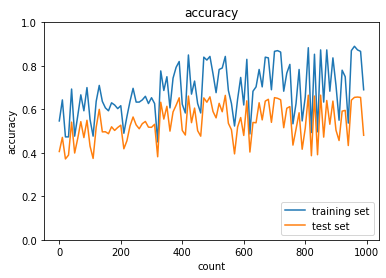

In [7]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.01
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### 0.001

0.001

### L2

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.6966666666666667
                : 10. 正答率(テスト) = 0.5476
Generation: 20. 正答率(トレーニング) = 0.7333333333333333
                : 20. 正答率(テスト) = 0.6065
Generation: 30. 正答率(トレーニング) = 0.79
                : 30. 正答率(テスト) = 0.5976
Generation: 40. 正答率(トレーニング) = 0.9433333333333334
                : 40. 正答率(テスト) = 0.7442
Generation: 50. 正答率(トレーニング) = 0.9466666666666667
                : 50. 正答率(テスト) = 0.7264
Generation: 60. 正答率(トレーニング) = 0.9933333333333333
                : 60. 正答率(テスト) = 0.7786
Generation: 70. 正答率(トレーニング) = 0.9933333333333333
                : 70. 正答率(テスト) = 0.7817
Generation: 80. 正答率(トレーニング) = 1.0
                : 80. 正答率(テスト) = 0.7839
Generation: 90. 正答率(トレーニング) = 1.0
                : 90. 正答率(テスト) = 0.779
Generation: 100. 正答率(トレーニング) = 1.0
                : 100. 正答率(テスト) = 0.7883
Generation: 110. 正答率(トレーニング) = 1.0
                : 110. 正答率(テスト) = 0.793
Generation: 120. 正答率(トレーニング) = 1.0
                : 120. 正答率(テスト) = 0.7872
Generat

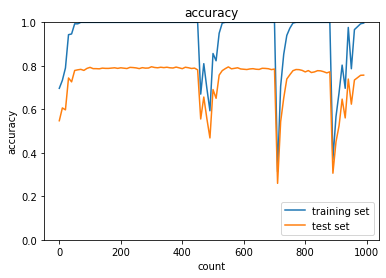

In [8]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.001
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.3433333333333333
                : 10. 正答率(テスト) = 0.28
Generation: 20. 正答率(トレーニング) = 0.48
                : 20. 正答率(テスト) = 0.3885
Generation: 30. 正答率(トレーニング) = 0.6966666666666667
                : 30. 正答率(テスト) = 0.5333
Generation: 40. 正答率(トレーニング) = 0.8933333333333333
                : 40. 正答率(テスト) = 0.6808
Generation: 50. 正答率(トレーニング) = 0.93
                : 50. 正答率(テスト) = 0.735
Generation: 60. 正答率(トレーニング) = 0.9566666666666667
                : 60. 正答率(テスト) = 0.7338
Generation: 70. 正答率(トレーニング) = 0.99
                : 70. 正答率(テスト) = 0.7674
Generation: 80. 正答率(トレーニング) = 0.9933333333333333
                : 80. 正答率(テスト) = 0.768
Generation: 90. 正答率(トレーニング) = 0.38
                : 90. 正答率(テスト) = 0.3091
Generation: 100. 正答率(トレーニング) = 0.6433333333333333
                : 100. 正答率(テスト) = 0.4795
Generation: 110. 正答率(トレーニング) = 0.96
                : 110. 正答率(テスト) = 0.7256
Generation: 120. 正答率(トレーニング) = 0.99
                : 120. 正答率(テスト) = 0.7648
Gene

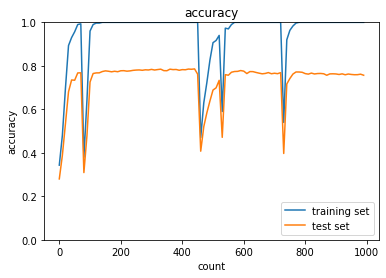

In [9]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.001
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Dropout

In [10]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] dropout_ratioの値を変更してみよう

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.13
                : 10. 正答率(テスト) = 0.1049
Generation: 20. 正答率(トレーニング) = 0.15333333333333332
                : 20. 正答率(テスト) = 0.1203
Generation: 30. 正答率(トレーニング) = 0.15666666666666668
                : 30. 正答率(テスト) = 0.1297
Generation: 40. 正答率(トレーニング) = 0.16
                : 40. 正答率(テスト) = 0.1393
Generation: 50. 正答率(トレーニング) = 0.19333333333333333
                : 50. 正答率(テスト) = 0.1506
Generation: 60. 正答率(トレーニング) = 0.20333333333333334
                : 60. 正答率(テスト) = 0.1634
Generation: 70. 正答率(トレーニング) = 0.23666666666666666
                : 70. 正答率(テスト) = 0.1785
Generation: 80. 正答率(トレーニング) = 0.26
                : 80. 正答率(テスト) = 0.1944
Generation: 90. 正答率(トレーニング) = 0.31
                : 90. 正答率(テスト) = 0.217
Generation: 100. 正答率(トレーニング) = 0.32666666666666666
                : 100. 正答率(テスト) = 0.2308
Generation: 110. 正答率(トレーニング) = 0.3333333333333333
                : 110. 正答率(テスト) = 0.25
Generation: 120. 正答率(トレーニング) = 0.35
                : 120. 正

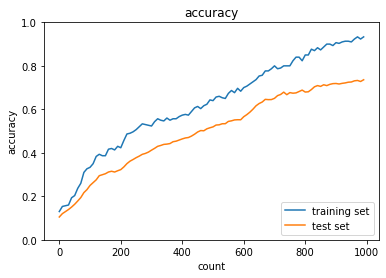

In [11]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## [try] optimizerとdropout_ratioの値を変更してみよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.12
                : 10. 正答率(テスト) = 0.1253
Generation: 20. 正答率(トレーニング) = 0.13
                : 20. 正答率(テスト) = 0.1325
Generation: 30. 正答率(トレーニング) = 0.15333333333333332
                : 30. 正答率(テスト) = 0.1436
Generation: 40. 正答率(トレーニング) = 0.14666666666666667
                : 40. 正答率(テスト) = 0.1596
Generation: 50. 正答率(トレーニング) = 0.18333333333333332
                : 50. 正答率(テスト) = 0.1863
Generation: 60. 正答率(トレーニング) = 0.20666666666666667
                : 60. 正答率(テスト) = 0.1931
Generation: 70. 正答率(トレーニング) = 0.23
                : 70. 正答率(テスト) = 0.205
Generation: 80. 正答率(トレーニング) = 0.25
                : 80. 正答率(テスト) = 0.2138
Generation: 90. 正答率(トレーニング) = 0.2633333333333333
                : 90. 正答率(テスト) = 0.2217
Generation: 100. 正答率(トレーニング) = 0.26
                : 100. 正答率(テスト) = 0.2312
Generation: 110. 正答率(トレーニング) = 0.26
                : 110. 正答率(テスト) = 0.2387
Generation: 120. 正答率(トレーニング) = 0.26
                : 120. 正答率(テスト) = 0.2356
Generation:

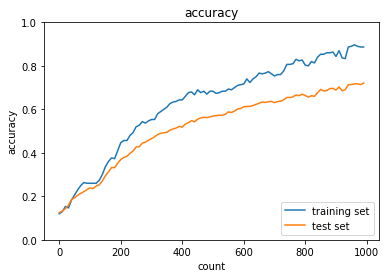

In [12]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.16
                : 10. 正答率(テスト) = 0.1339
Generation: 20. 正答率(トレーニング) = 0.16
                : 20. 正答率(テスト) = 0.1396
Generation: 30. 正答率(トレーニング) = 0.16333333333333333
                : 30. 正答率(テスト) = 0.1439
Generation: 40. 正答率(トレーニング) = 0.17333333333333334
                : 40. 正答率(テスト) = 0.153
Generation: 50. 正答率(トレーニング) = 0.18666666666666668
                : 50. 正答率(テスト) = 0.1635
Generation: 60. 正答率(トレーニング) = 0.17666666666666667
                : 60. 正答率(テスト) = 0.1459
Generation: 70. 正答率(トレーニング) = 0.19
                : 70. 正答率(テスト) = 0.1509
Generation: 80. 正答率(トレーニング) = 0.20333333333333334
                : 80. 正答率(テスト) = 0.1556
Generation: 90. 正答率(トレーニング) = 0.20666666666666667
                : 90. 正答率(テスト) = 0.1529
Generation: 100. 正答率(トレーニング) = 0.22333333333333333
                : 100. 正答率(テスト) = 0.1661
Generation: 110. 正答率(トレーニング) = 0.24333333333333335
                : 110. 正答率(テスト) = 0.1788
Generation: 120. 正答率(トレーニング) = 0.283333333

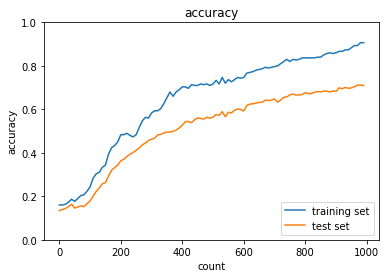

In [13]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.13666666666666666
                : 10. 正答率(テスト) = 0.1219
Generation: 20. 正答率(トレーニング) = 0.23
                : 20. 正答率(テスト) = 0.1905
Generation: 30. 正答率(トレーニング) = 0.26
                : 30. 正答率(テスト) = 0.2402
Generation: 40. 正答率(トレーニング) = 0.32666666666666666
                : 40. 正答率(テスト) = 0.2714
Generation: 50. 正答率(トレーニング) = 0.4
                : 50. 正答率(テスト) = 0.3253
Generation: 60. 正答率(トレーニング) = 0.49666666666666665
                : 60. 正答率(テスト) = 0.39
Generation: 70. 正答率(トレーニング) = 0.59
                : 70. 正答率(テスト) = 0.461
Generation: 80. 正答率(トレーニング) = 0.6233333333333333
                : 80. 正答率(テスト) = 0.5143
Generation: 90. 正答率(トレーニング) = 0.66
                : 90. 正答率(テスト) = 0.5502
Generation: 100. 正答率(トレーニング) = 0.7366666666666667
                : 100. 正答率(テスト) = 0.6101
Generation: 110. 正答率(トレーニング) = 0.7366666666666667
                : 110. 正答率(テスト) = 0.6208
Generation: 120. 正答率(トレーニング) = 0.77
                : 120. 正答率(テスト) = 0.6431
G

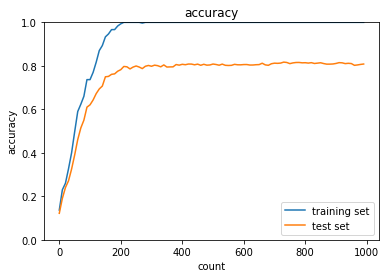

In [14]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
# optimizer = optimizer.SGD(learning_rate=0.01)
optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.5633333333333334
                : 10. 正答率(テスト) = 0.4365
Generation: 20. 正答率(トレーニング) = 0.7
                : 20. 正答率(テスト) = 0.568
Generation: 30. 正答率(トレーニング) = 0.8766666666666667
                : 30. 正答率(テスト) = 0.7061
Generation: 40. 正答率(トレーニング) = 0.9366666666666666
                : 40. 正答率(テスト) = 0.7317
Generation: 50. 正答率(トレーニング) = 0.9633333333333334
                : 50. 正答率(テスト) = 0.7712
Generation: 60. 正答率(トレーニング) = 0.9733333333333334
                : 60. 正答率(テスト) = 0.7847
Generation: 70. 正答率(トレーニング) = 0.99
                : 70. 正答率(テスト) = 0.7869
Generation: 80. 正答率(トレーニング) = 0.9866666666666667
                : 80. 正答率(テスト) = 0.7901
Generation: 90. 正答率(トレーニング) = 0.99
                : 90. 正答率(テスト) = 0.793
Generation: 100. 正答率(トレーニング) = 0.9966666666666667
                : 100. 正答率(テスト) = 0.799
Generation: 110. 正答率(トレーニング) = 0.9966666666666667
                : 110. 正答率(テスト) = 0.7974
Generation: 120. 正答率(トレーニング) = 0.9966666666666667
   

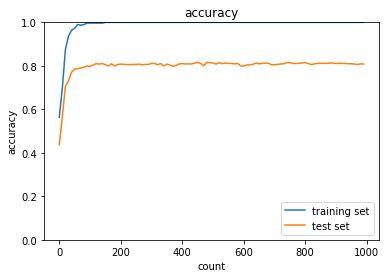

In [15]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
# optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.22
                : 10. 正答率(テスト) = 0.1715
Generation: 20. 正答率(トレーニング) = 0.5066666666666667
                : 20. 正答率(テスト) = 0.3885
Generation: 30. 正答率(トレーニング) = 0.6
                : 30. 正答率(テスト) = 0.4926
Generation: 40. 正答率(トレーニング) = 0.6866666666666666
                : 40. 正答率(テスト) = 0.5502
Generation: 50. 正答率(トレーニング) = 0.7466666666666667
                : 50. 正答率(テスト) = 0.5902
Generation: 60. 正答率(トレーニング) = 0.8166666666666667
                : 60. 正答率(テスト) = 0.6366
Generation: 70. 正答率(トレーニング) = 0.87
                : 70. 正答率(テスト) = 0.7056
Generation: 80. 正答率(トレーニング) = 0.9133333333333333
                : 80. 正答率(テスト) = 0.7061
Generation: 90. 正答率(トレーニング) = 0.9566666666666667
                : 90. 正答率(テスト) = 0.7433
Generation: 100. 正答率(トレーニング) = 0.9733333333333334
                : 100. 正答率(テスト) = 0.7594
Generation: 110. 正答率(トレーニング) = 0.9866666666666667
                : 110. 正答率(テスト) = 0.7757
Generation: 120. 正答率(トレーニング) = 0.9933333333333333


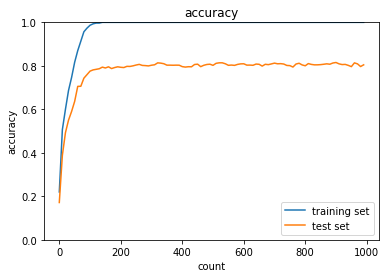

In [16]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
# optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Dropout + L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.07333333333333333
                : 10. 正答率(テスト) = 0.0798
Generation: 20. 正答率(トレーニング) = 0.07666666666666666
                : 20. 正答率(テスト) = 0.084
Generation: 30. 正答率(トレーニング) = 0.08333333333333333
                : 30. 正答率(テスト) = 0.0849
Generation: 40. 正答率(トレーニング) = 0.09
                : 40. 正答率(テスト) = 0.0868
Generation: 50. 正答率(トレーニング) = 0.10333333333333333
                : 50. 正答率(テスト) = 0.0907
Generation: 60. 正答率(トレーニング) = 0.11666666666666667
                : 60. 正答率(テスト) = 0.0963
Generation: 70. 正答率(トレーニング) = 0.12333333333333334
                : 70. 正答率(テスト) = 0.1002
Generation: 80. 正答率(トレーニング) = 0.14333333333333334
                : 80. 正答率(テスト) = 0.1047
Generation: 90. 正答率(トレーニング) = 0.14333333333333334
                : 90. 正答率(テスト) = 0.1082
Generation: 100. 正答率(トレーニング) = 0.14666666666666667
                : 100. 正答率(テスト) = 0.1126
Generation: 110. 正答率(トレーニング) = 0.14666666666666667
                : 110. 正答率(テスト) = 0.1186
Generation: 

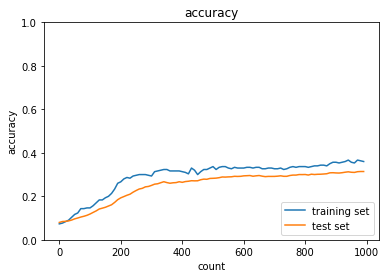

In [17]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()